# PCA
Principal Component Analysis

algoritma PCA digunakan untuk mengurangi dimensi data

saat data kita memiliki 1 fitur kita bisa bilang datanya punya 1 dimensi, 1 kolom, kalau di plot dia jadi 1 garis.

kalau ada 2 fitur, data jadi 2 dimensi, ada 2 axis berbeda. misalnya berat dan tinggi badan, kita bisa taruh berat sebagai 1 axis di y-axis dan tinggi sebagai 1 axis di y-axis. jadilah grafik 2 dimensi menunjukkan data kita

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.decomposition import PCA

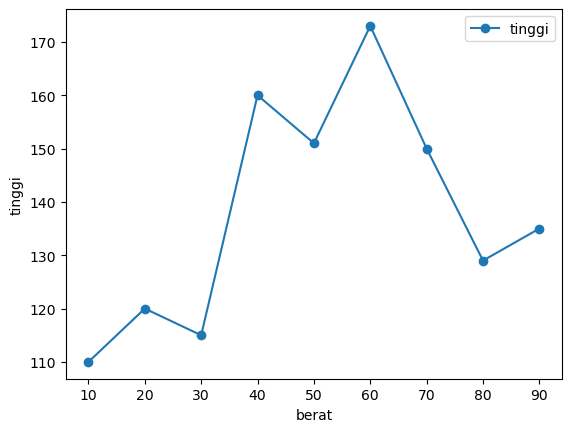

In [2]:
df = pd.DataFrame({
    "berat":range(10,100,10), 
    "tinggi": [110, 120, 115, 160, 151, 173, 150, 129, 135]})
df = df.set_index("berat")

df.plot(marker="o")

plt.xlabel("berat")
plt.ylabel("tinggi")
plt.show()

bisa dilihat di contoh grafik diatas, saat data ada 2set, 2fitur, maka akan menjadi 2 dimensi

PCA menggabungkan fitur-fitur menjadi 1 kolom

yang dilakukan PCA adalah:
1. membuat titik tengah antara semua data
2. geser semua data sampai titik tengah ada di posisi 0,0,0
3. mencari data jaraknya yang terjauh satu sama lain, kemudian menarik garis lurus melewati data tersebut
4. datanya kemudian di "tarik" ke garis PC1 tersebut, untuk menjadi Principal Component 1
5. pembuatan PC2 dan seterusnya memilki posisi titik tengah yang sama 0,0,0 dan semuanya perpendicular 90 derajat dari PC1 dan seterusnya.

kalau kita punya data 3 dimensi, kita bisa membuat 3 PC maximum.

kalau kita punya data 100 dimensi, kita bisa membuat 100 PC maximum.

PC bisa kita gunakan untuk membantu analisa data. Misalnya kita ambil 2 PC pertama untuk membuat plot 2 dimensi.

Value yang dibuat di PC tidak bisa kita interpretasikan menjadi fitur, karena sudah merupakan gabungan semua fitur data kita.

Umumnya, teknik PCA digunakan untuk mengurangi dimensi data. Jadi saat kita membuat model machine learning, tidak harus dari data awal 100 fitur (100 dimensi).

In [3]:
# import data
df_penguin = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/penguins.csv")
df_penguin.head()

# explore data
df_penguin.info()

# data cleaning - missing values
df_penguin2 = df_penguin.dropna()

# data cleaning - remove invalid values - cek file clustering kenapa kt tau mrk invalid data
df_penguin2 = df_penguin2.drop(index=[9, 14, 336])

# data processing - encoding
le = LabelEncoder()
le.fit(df_penguin2['sex'])
print(le.classes_)
df_penguin2['sex'] = le.transform(df_penguin2['sex'])
df_penguin2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
['FEMALE' 'MALE']


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


Saat mau membuat PCA

baiknya datanya di scaling, karena PCA rentan bergantung pada value raw datanya, jadi dari contoh data kita misalnya, dia akan paling tertarik ke perubahahan body_mass_g karena angkanya paling besar besar.

scaling membuat level pentingya setiap fitur jadi sama

In [21]:
scaler = StandardScaler()
df_penguin3 = scaler.fit_transform(df_penguin2)
df_penguin3 = pd.DataFrame(df_penguin3, columns=df_penguin2.columns)
df_penguin3

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994
...,...,...,...,...,...
327,0.583904,-1.764152,0.929309,0.892415,-1.006042
328,0.510432,-1.457611,1.000662,0.799264,-1.006042
329,1.171681,-0.742347,1.500134,1.917074,0.993994
330,0.216543,-1.202160,0.786603,1.233968,-1.006042


perhatikan bagaimana angka data kita berubah, skala antar kolom/ fitur jadi sama

sebenarnya angka ini pun sudah tidak bisa kita gunakan sebagai value fitur awal. step ini khusus dilakukan untuk prep data sebelum kita gunakan melatih model machine learning.

In [22]:
# membuat PCA
model_pca = PCA()
pca_penguin = model_pca.fit_transform(df_penguin3)

col_names = []
for i in range(len(df_penguin3.columns)):
    col_names.append("PC "+str(i+1))

df_pca_penguin = pd.DataFrame(pca_penguin, columns=col_names)

df_pca_penguin

,PC 1,PC 2,PC 3,PC 4,PC 5
0,-1.569684,1.195904,-0.634140,-0.630459,0.298431
1,-1.537253,-0.713249,-0.041895,0.110392,0.478099
2,-1.587616,-0.578568,0.317554,0.377346,-0.401357
3,-2.055549,-0.236919,-0.202465,0.933734,-0.189763
4,-1.580653,1.768972,-0.455670,0.252874,-0.181983
...,...,...,...,...,...
327,1.641898,-1.835777,0.134203,-0.077750,0.188032
328,1.495147,-1.659266,0.150926,0.141357,0.077783
329,2.922152,0.379297,-0.320098,0.031921,0.226253
330,1.395265,-1.504947,-0.188964,0.388581,0.497281


In [23]:
pd.DataFrame(model_pca.components_, index=col_names, columns=df_penguin2.columns)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
PC 1,0.462319,-0.330573,0.563407,0.554483,0.228262
PC 2,0.177171,0.653931,-0.098070,0.042207,0.727726
PC 3,0.842770,0.169792,-0.096464,-0.359399,-0.349909
PC 4,-0.168957,0.657799,0.446532,0.287824,-0.506479
PC 5,0.126741,0.039584,-0.681366,0.691922,-0.198379


PC 1 terbuat dari 0.462319 fitur culmen_length_mm - 0.330573 fitur culmen_depth_mm + 0.563407 filter_length_mm + 0.554483 body_mass_g + 0.228262 fitur sex

PC 1 adalah sebuah angka gabungan dari fitur fitur awal kita

tapi karena kita sudah lakukan scaling, sebenarnya ini juga bukan angka 0.55 * berat penguin lagi

kita lakukan semua ini demi bisa mengurangi dimensi data, tanpa kehilangan jarak antar data yang asli, dan tanpa menghapus fitur apapun.

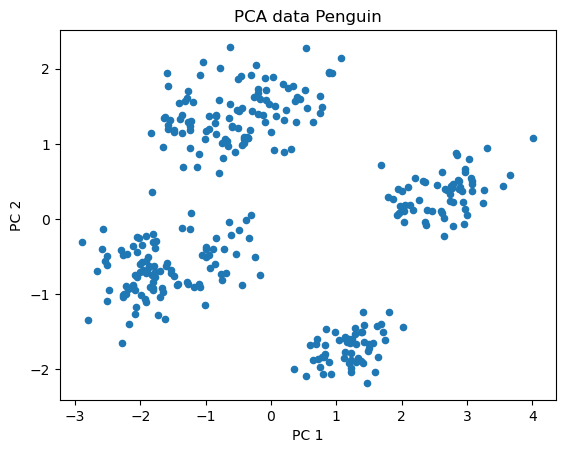

In [27]:
df_pca_penguin.plot(kind="scatter", x='PC 1', y="PC 2")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA data Penguin")
plt.show()

dari hasil PCA kita, sepertinya ada 4 (atau 6) kelompok penguin berbeda